In [160]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,6
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
races = pd.read_csv('D:\\Netology\DS\kaggle\\races.csv')
quali = pd.read_csv('D:\\Netology\DS\kaggle\\qualifying.csv')
drivers = pd.read_csv('D:\\Netology\DS\kaggle\\drivers.csv')
results = pd.read_csv('D:\\Netology\DS\kaggle\\results.csv')
circuits = pd.read_csv('D:\\Netology\DS\kaggle\\circuits.csv')
constructors = pd.read_csv('D:\\Netology\DS\kaggle\\constructors.csv')
status =pd.read_csv('D:\\Netology\DS\kaggle\\status.csv')

In [8]:
races.head()


,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [21]:
quali.rename(columns={'position': 'quali_position'}, inplace=True)
quali.head()

,qualifyId,raceId,driverId,constructorId,number,quali_position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [10]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [11]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [12]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park


In [5]:
df = (
    results
    .merge(races, how = 'inner', on = 'raceId')
    .merge(drivers, how = 'left', on = 'driverId')
#     .merge(quali, how = 'inner', on = 'raceId')
)

In [6]:
df.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,time_y,url_x,driverRef,number_y,code,forename,surname,dob,nationality,url_y
0,1,18,1,1,22,1,1,1,1,10.0,...,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,18,2,2,3,5,2,2,2,8.0,...,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,18,3,3,7,7,3,3,3,6.0,...,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,18,4,4,5,11,4,4,4,5.0,...,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,18,5,1,23,3,5,5,5,4.0,...,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [7]:
pole_win = df[['raceId', 'name', 'circuitId', 'date', 'grid', 'positionOrder', 'surname', 'points']]

In [8]:
pole_win = pole_win.loc[pole_win['positionOrder'] == 1].loc[pole_win['grid'] == 1]
pw = pole_win.groupby(['name']).count()

In [9]:
number_of_races = races.groupby(['name']).count()
nr = number_of_races['circuitId']

In [10]:
finaldf = pw.merge(nr, how = 'left', on = 'name').reset_index()

In [11]:
finaldf.rename(columns={'raceId': 'races with wins from pole', 'circuitId_y' : 'total number of races'}, inplace=True)
finaldf = finaldf[['name', 'races with wins from pole', 'total number of races']]

In [12]:
finaldf = finaldf[finaldf['total number of races'] >= 10]
finaldf = finaldf.set_index('name')
finaldf

,races with wins from pole,total number of races
name,,
Abu Dhabi Grand Prix,6,11
Argentine Grand Prix,7,20
Australian Grand Prix,14,35
Austrian Grand Prix,10,33
Bahrain Grand Prix,6,15
Belgian Grand Prix,25,65
Brazilian Grand Prix,17,47
British Grand Prix,26,71
Canadian Grand Prix,23,50


Text(0.5, 1.0, 'Победы в гонке при старте с 1 позиции на старте')

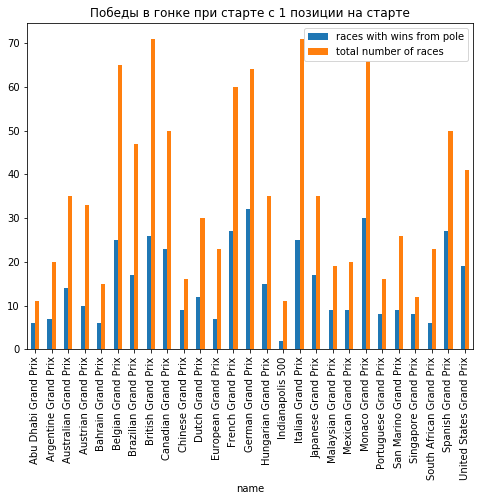

In [124]:
finaldf.plot(kind='bar', stacked = False).set_title('Победы в гонке при старте с 1 позиции на старте')

Text(0.5, 1.0, 'Набранные очки в чемпионате после смены технического регламента')

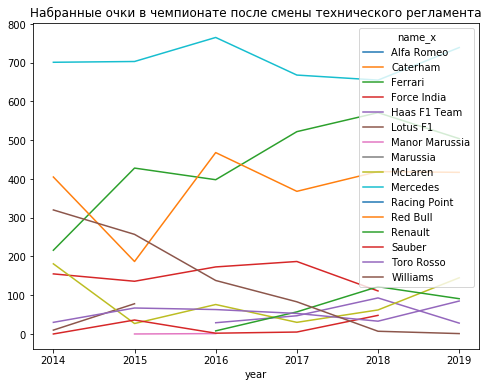

In [125]:
cdf = results.merge(constructors, how = 'left', on = 'constructorId').merge(races, how = 'left', on = 'raceId')
cdf = cdf[['name_x', 'year', 'points']]
cdf.reset_index()
# cdf.groupby(['name_x',]).sum()
cdf = cdf[(cdf['year'] >= 2014) & (cdf['year'] <2020)]
# cdf.groupby(['year', 'name_x']).sum()
bx = cdf.pivot_table(index = 'year', columns = 'name_x', values = 'points', aggfunc = 'sum').plot()
bx.set_title('Набранные очки в чемпионате после смены технического регламента')

Text(0.5, 0, 'Статус поломки')

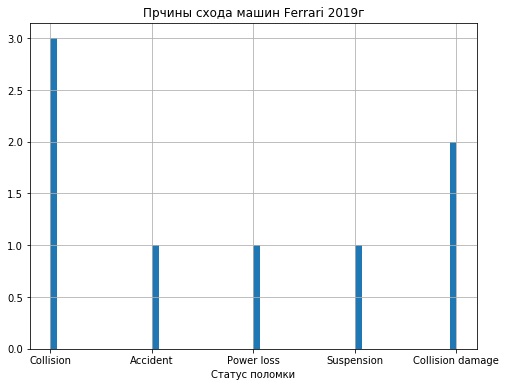

In [123]:
dnf = results.merge(status, how = 'left', on = 'statusId').merge(races, how = 'left', on = 'raceId').merge(constructors, how = 'left', on = 'constructorId')
dnf = dnf[['name_y', 'year', 'status', 'statusId']]
dnf = dnf[(dnf['year'] >= 2019) & (dnf['statusId'] > 1) & (dnf['name_y'] == 'Ferrari') & (dnf['statusId'] != 11)]
dnf = dnf['status']
ax = dnf.hist(bins = 60)
ax.set_title('Прчины схода машин Ferrari 2019г')
ax.set_xlabel('Статус поломки')

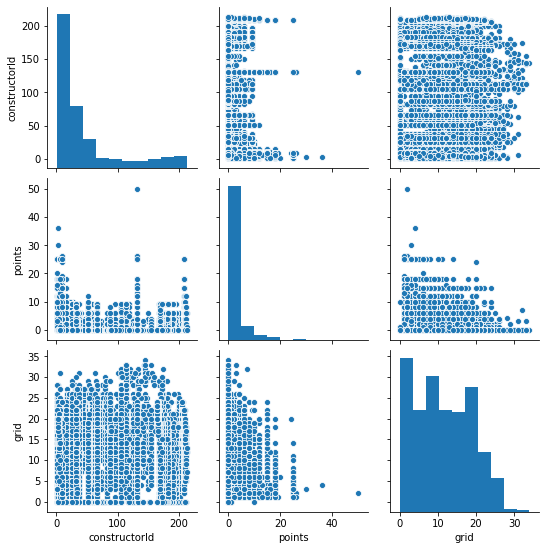

In [143]:
dnf = results.merge(status, how = 'left', on = 'statusId').merge(races, how = 'left', on = 'raceId').merge(constructors, how = 'left', on = 'constructorId')
dnf = dnf[['constructorId', 'year', 'grid', 'points']]
snsax = dnf[dnf['year'] >= 2019]
sns_plot = sns.pairplot(
    dnf[['constructorId', 'points', 'grid']])
sns_plot

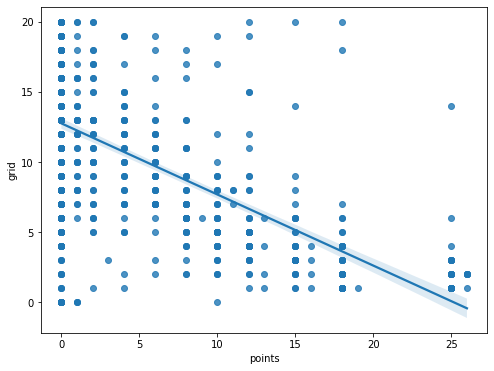

In [169]:
dnf = results.merge(races, how = 'left', on = 'raceId')
dnf = dnf[dnf['year'] >= 2018]
sns.regplot(x="points", y="grid", data=dnf);